In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%autosave 0

Autosave disabled


In [260]:
summary_mean = pd.read_csv('summary_mean.csv', sep = ',')
summary_std = pd.read_csv('summary_std.csv', sep = ',')

In [261]:
summary_mean.head()

,Maze,Mode,Intuition,Heuristics,Time Steps 1,Path Length 1,Time Steps 2,Path Length 2,Time Steps 3,Path Length 3,Coverage,Score,Exploration Time,Computation Time,Maze Size,Number of Grid Visited Per Time Step during Exploration,Number of Grid Visited Per Path Length during Exploration
0,1,complete,False,False,186.9,222.2,6.9,13.6,17.0,32.0,1.00,24.03,411.58,412.02,144.0,0.77,0.65
1,1,complete,False,True,185.6,217.3,8.3,15.3,17.0,32.0,1.00,24.03,96.16,96.54,144.0,0.78,0.66
2,1,complete,True,False,188.3,222.1,9.8,17.7,17.0,32.0,1.00,24.17,102.46,102.86,144.0,0.77,0.65
3,1,complete,True,True,189.3,220.9,9.0,17.7,17.0,32.0,1.00,24.18,45.33,45.73,144.0,0.76,0.65
4,1,incomplete,False,False,107.5,122.6,18.2,31.6,18.2,32.4,0.65,23.00,211.81,212.18,144.0,0.89,0.80


Compare the "Number of Grid Visited Per Time Step during Exploration" and "Exploration Time" between "complete" and "incomplete" mode when "intuition" and "heuristics" are false.

In [262]:
dataset_complete_means = summary_mean[(summary_mean['Mode'] == 'complete') & (summary_mean['Intuition'] == False) & (summary_mean['Heuristics'] == False)]
dataset_incomplete_means = summary_mean[(summary_mean['Mode'] == 'incomplete') & (summary_mean['Intuition'] == False) & (summary_mean['Heuristics'] == False)]

In [263]:
dataset_complete_std = summary_std[(summary_std['Mode'] == 'complete') & (summary_std['Intuition'] == False) & (summary_std['Heuristics'] == False)]
dataset_incomplete_std = summary_std[(summary_std['Mode'] == 'incomplete') & (summary_std['Intuition'] == False) & (summary_std['Heuristics'] == False)]

In [264]:
dataset_complete_nsquares_means = dataset_complete_means['Number of Grid Visited Per Time Step during Exploration'].tolist()
dataset_incomplete_nsquares_means = dataset_incomplete_means['Number of Grid Visited Per Time Step during Exploration'].tolist()

In [265]:
dataset_complete_nsquares_std = dataset_complete_std['Number of Grid Visited Per Time Step during Exploration'].tolist()
dataset_incomplete_nsquares_std = dataset_incomplete_std['Number of Grid Visited Per Time Step during Exploration'].tolist()

In [266]:
dataset_complete_exploration_means = dataset_complete_means['Exploration Time'].tolist()
dataset_incomplete_exploration_means = dataset_incomplete_means['Exploration Time'].tolist()

In [267]:
dataset_complete_exploration_std = dataset_complete_std['Exploration Time'].tolist()
dataset_incomplete_exploration_std = dataset_incomplete_std['Exploration Time'].tolist()

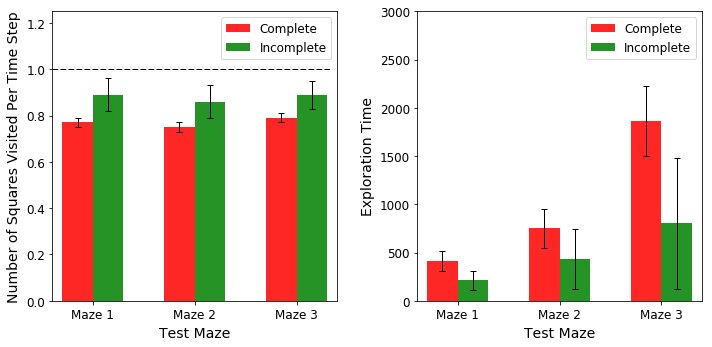

In [268]:
dataset_1_means = dataset_complete_nsquares_means
dataset_2_means = dataset_incomplete_nsquares_means
dataset_1_std = dataset_complete_nsquares_std
dataset_2_std = dataset_incomplete_nsquares_std

N = len(dataset_1_means)
ind = np.arange(N)  # the x locations for the groups
width = 0.30       # the width of the bars
alpha = 0.85

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

rects1 = ax[0].bar(ind, dataset_1_means, width, color='r', yerr = dataset_1_std, alpha = alpha, 
                capsize = 3, error_kw = {'elinewidth':1})
rects2 = ax[0].bar(ind + width, dataset_2_means, width, color='g', yerr = dataset_2_std, alpha = alpha, 
                capsize = 3, error_kw = {'elinewidth':1})

line_1 = ax[0].plot(np.linspace(-0.25, 2.5, 100), np.linspace(1.0, 1.0, 100), linestyle = '--', linewidth = 1, color = 'black', alpha = 1)

ax[0].set_ylim([0,1.25])
ax[0].set_xlim([-0.25,2.55])
# add some text for labels, title and axes ticks
ax[0].set_xlabel('Test Maze', fontsize=14,  labelpad = 5)
ax[0].set_ylabel('Number of Squares Visited Per Time Step', fontsize=14, labelpad = 5)
ax[0].set_title('')
ax[0].set_xticks(ind + width / 2)
ax[0].set_xticklabels(('Maze 1', 'Maze 2', 'Maze 3'))

ax[0].legend((rects1[0], rects2[0]), ('Complete', 'Incomplete'), loc = 'upper right', fontsize=12)

ax[0].tick_params(labelsize=12)

dataset_1_means = dataset_complete_exploration_means
dataset_2_means = dataset_incomplete_exploration_means
dataset_1_std = dataset_complete_exploration_std
dataset_2_std = dataset_incomplete_exploration_std

rects1 = ax[1].bar(ind, dataset_1_means, width, color='r', yerr = dataset_1_std, alpha = alpha, 
                capsize = 3, error_kw = {'elinewidth':1})
rects2 = ax[1].bar(ind + width, dataset_2_means, width, color='g', yerr = dataset_2_std, alpha = alpha, 
                capsize = 3, error_kw = {'elinewidth':1})

ax[1].set_ylim([0,3000])
ax[1].set_xlim([-0.25,2.55])
# add some text for labels, title and axes ticks
ax[1].set_xlabel('Test Maze', fontsize=14,  labelpad = 5)
ax[1].set_ylabel('Exploration Time', fontsize=14, labelpad = 5)
ax[1].set_title('')
ax[1].set_xticks(ind + width / 2)
ax[1].set_xticklabels(('Maze 1', 'Maze 2', 'Maze 3'))

ax[1].legend((rects1[0], rects2[0]), ('Complete', 'Incomplete'), loc = 'upper right', fontsize=12)

ax[1].tick_params(labelsize=12)

plt.tight_layout(w_pad=2, h_pad=0)
plt.show()

fig.savefig('complete_vs_incomplete.jpeg', format='jpeg', dpi=600, bbox_inches='tight')

Compare the "Number of Grid Visited Per Time Step during Exploration" and "Exploration Time" between "True" and "False" of "Heuristics" mode when "Mode" is "Incomplete" and "Intuition" are false.

In [269]:
dataset_heuristics_means = summary_mean[(summary_mean['Mode'] == 'complete') & (summary_mean['Intuition'] == False) & (summary_mean['Heuristics'] == True)]
dataset_not_heuristics_means = summary_mean[(summary_mean['Mode'] == 'complete') & (summary_mean['Intuition'] == False) & (summary_mean['Heuristics'] == False)]

In [270]:
dataset_heuristics_std = summary_std[(summary_std['Mode'] == 'complete') & (summary_std['Intuition'] == False) & (summary_std['Heuristics'] == True)]
dataset_not_heuristics_std = summary_std[(summary_std['Mode'] == 'complete') & (summary_std['Intuition'] == False) & (summary_std['Heuristics'] == False)]

In [271]:
dataset_heuristics_nsquares_means = dataset_heuristics_means['Number of Grid Visited Per Time Step during Exploration'].tolist()
dataset_not_heuristics_nsquares_means = dataset_not_heuristics_means['Number of Grid Visited Per Time Step during Exploration'].tolist()

In [272]:
dataset_heuristics_nsquares_std = dataset_heuristics_std['Number of Grid Visited Per Time Step during Exploration'].tolist()
dataset_not_heuristics_nsquares_std = dataset_not_heuristics_std['Number of Grid Visited Per Time Step during Exploration'].tolist()

In [273]:
dataset_heuristics_exploration_means = dataset_heuristics_means['Exploration Time'].tolist()
dataset_not_heuristics_exploration_means = dataset_not_heuristics_means['Exploration Time'].tolist()

In [274]:
dataset_heuristics_exploration_std = dataset_heuristics_std['Exploration Time'].tolist()
dataset_not_heuristics_exploration_std = dataset_not_heuristics_std['Exploration Time'].tolist()

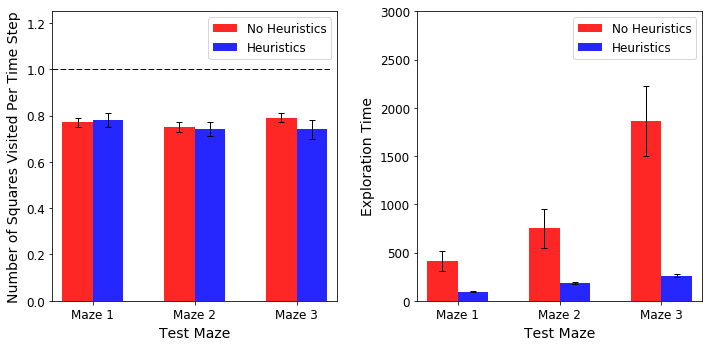

In [275]:
dataset_1_means = dataset_not_heuristics_nsquares_means
dataset_2_means = dataset_heuristics_nsquares_means
dataset_1_std = dataset_not_heuristics_nsquares_std
dataset_2_std = dataset_heuristics_nsquares_std

N = len(dataset_1_means)
ind = np.arange(N)  # the x locations for the groups
width = 0.30       # the width of the bars
alpha = 0.85

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

rects1 = ax[0].bar(ind, dataset_1_means, width, color='red', yerr = dataset_1_std, alpha = alpha, 
                capsize = 3, error_kw = {'elinewidth':1})
rects2 = ax[0].bar(ind + width, dataset_2_means, width, color='blue', yerr = dataset_2_std, alpha = alpha, 
                capsize = 3, error_kw = {'elinewidth':1})

line_1 = ax[0].plot(np.linspace(-0.25, 2.5, 100), np.linspace(1.0, 1.0, 100), linestyle = '--', linewidth = 1, color = 'black', alpha = 1)

ax[0].set_ylim([0,1.25])
ax[0].set_xlim([-0.25,2.55])
# add some text for labels, title and axes ticks
ax[0].set_xlabel('Test Maze', fontsize=14,  labelpad = 5)
ax[0].set_ylabel('Number of Squares Visited Per Time Step', fontsize=14, labelpad = 5)
ax[0].set_title('')
ax[0].set_xticks(ind + width / 2)
ax[0].set_xticklabels(('Maze 1', 'Maze 2', 'Maze 3'))

ax[0].legend((rects1[0], rects2[0]), ('No Heuristics', 'Heuristics'), loc = 'upper right', fontsize=12)

ax[0].tick_params(labelsize=12)

dataset_1_means = dataset_not_heuristics_exploration_means
dataset_2_means = dataset_heuristics_exploration_means
dataset_1_std = dataset_not_heuristics_exploration_std
dataset_2_std = dataset_heuristics_exploration_std

rects1 = ax[1].bar(ind, dataset_1_means, width, color='red', yerr = dataset_1_std, alpha = alpha, 
                capsize = 3, error_kw = {'elinewidth':1})
rects2 = ax[1].bar(ind + width, dataset_2_means, width, color='blue', yerr = dataset_2_std, alpha = alpha, 
                capsize = 3, error_kw = {'elinewidth':1})

ax[1].set_ylim([0,3000])
ax[1].set_xlim([-0.25,2.55])
# add some text for labels, title and axes ticks
ax[1].set_xlabel('Test Maze', fontsize=14,  labelpad = 5)
ax[1].set_ylabel('Exploration Time', fontsize=14, labelpad = 5)
ax[1].set_title('')
ax[1].set_xticks(ind + width / 2)
ax[1].set_xticklabels(('Maze 1', 'Maze 2', 'Maze 3'))

ax[1].legend((rects1[0], rects2[0]), ('No Heuristics', 'Heuristics'), loc = 'upper right', fontsize=12)

ax[1].tick_params(labelsize=12)

plt.tight_layout(w_pad=2, h_pad=0)
plt.show()

fig.savefig('no_heuristics_vs_heuristics.jpeg', format='jpeg', dpi=600, bbox_inches='tight')

Compare the "Number of Grid Visited Per Time Step during Exploration" and "Exploration Time" between "True" and "False" of "Intuition" mode when "Mode" is "Incomplete" and "Heuristics" are false.

In [276]:
dataset_intuition_means = summary_mean[(summary_mean['Mode'] == 'complete') & (summary_mean['Intuition'] == True) & (summary_mean['Heuristics'] == False)]
dataset_not_intuition_means = summary_mean[(summary_mean['Mode'] == 'complete') & (summary_mean['Intuition'] == False) & (summary_mean['Heuristics'] == False)]

In [277]:
dataset_intuition_std = summary_std[(summary_std['Mode'] == 'complete') & (summary_std['Intuition'] == True) & (summary_std['Heuristics'] == False)]
dataset_not_intuition_std = summary_std[(summary_std['Mode'] == 'complete') & (summary_std['Intuition'] == False) & (summary_std['Heuristics'] == False)]

In [278]:
dataset_intuition_nsquares_means = dataset_intuition_means['Number of Grid Visited Per Time Step during Exploration'].tolist()
dataset_not_intuition_nsquares_means = dataset_not_intuition_means['Number of Grid Visited Per Time Step during Exploration'].tolist()

In [279]:
dataset_intuition_nsquares_std = dataset_intuition_std['Number of Grid Visited Per Time Step during Exploration'].tolist()
dataset_not_intuition_nsquares_std = dataset_not_intuition_std['Number of Grid Visited Per Time Step during Exploration'].tolist()

In [280]:
dataset_intuition_exploration_means = dataset_intuition_means['Exploration Time'].tolist()
dataset_not_intuition_exploration_means = dataset_not_intuition_means['Exploration Time'].tolist()

In [281]:
dataset_intuition_exploration_std = dataset_intuition_std['Exploration Time'].tolist()
dataset_not_intuition_exploration_std = dataset_not_intuition_std['Exploration Time'].tolist()

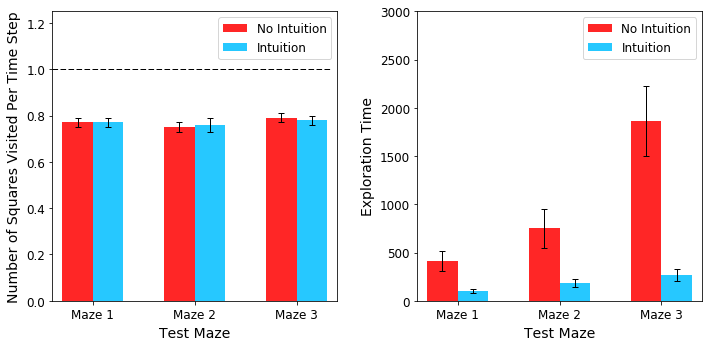

In [282]:
dataset_1_means = dataset_not_intuition_nsquares_means
dataset_2_means = dataset_intuition_nsquares_means
dataset_1_std = dataset_not_intuition_nsquares_std
dataset_2_std = dataset_intuition_nsquares_std

N = len(dataset_1_means)
ind = np.arange(N)  # the x locations for the groups
width = 0.30       # the width of the bars
alpha = 0.85

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

rects1 = ax[0].bar(ind, dataset_1_means, width, color='red', yerr = dataset_1_std, alpha = alpha, 
                capsize = 3, error_kw = {'elinewidth':1})
rects2 = ax[0].bar(ind + width, dataset_2_means, width, color='deepskyblue', yerr = dataset_2_std, alpha = alpha, 
                capsize = 3, error_kw = {'elinewidth':1})

line_1 = ax[0].plot(np.linspace(-0.25, 2.5, 100), np.linspace(1.0, 1.0, 100), linestyle = '--', linewidth = 1, color = 'black', alpha = 1)

ax[0].set_ylim([0,1.25])
ax[0].set_xlim([-0.25,2.55])
# add some text for labels, title and axes ticks
ax[0].set_xlabel('Test Maze', fontsize=14,  labelpad = 5)
ax[0].set_ylabel('Number of Squares Visited Per Time Step', fontsize=14, labelpad = 5)
ax[0].set_title('')
ax[0].set_xticks(ind + width / 2)
ax[0].set_xticklabels(('Maze 1', 'Maze 2', 'Maze 3'))

ax[0].legend((rects1[0], rects2[0]), ('No Intuition', 'Intuition'), loc = 'upper right', fontsize=12)

ax[0].tick_params(labelsize=12)

dataset_1_means = dataset_not_intuition_exploration_means
dataset_2_means = dataset_intuition_exploration_means
dataset_1_std = dataset_not_intuition_exploration_std
dataset_2_std = dataset_intuition_exploration_std

rects1 = ax[1].bar(ind, dataset_1_means, width, color='red', yerr = dataset_1_std, alpha = alpha, 
                capsize = 3, error_kw = {'elinewidth':1})
rects2 = ax[1].bar(ind + width, dataset_2_means, width, color='deepskyblue', yerr = dataset_2_std, alpha = alpha, 
                capsize = 3, error_kw = {'elinewidth':1})

ax[1].set_ylim([0,3000])
ax[1].set_xlim([-0.25,2.55])
# add some text for labels, title and axes ticks
ax[1].set_xlabel('Test Maze', fontsize=14,  labelpad = 5)
ax[1].set_ylabel('Exploration Time', fontsize=14, labelpad = 5)
ax[1].set_title('')
ax[1].set_xticks(ind + width / 2)
ax[1].set_xticklabels(('Maze 1', 'Maze 2', 'Maze 3'))

ax[1].legend((rects1[0], rects2[0]), ('No Intuition', 'Intuition'), loc = 'upper right', fontsize=12)

ax[1].tick_params(labelsize=12)

plt.tight_layout(w_pad=2, h_pad=0)
plt.show()

fig.savefig('no_intuition_vs_intuition.jpeg', format='jpeg', dpi=600, bbox_inches='tight')

Compare the "Score" and "Computation Time" between ("Complete", "Heuristics", "Intuition") and ("Incomplete", "No Heuristics", "No Intuition").

In [283]:
dataset_worst_means = summary_mean[(summary_mean['Mode'] == 'complete') & (summary_mean['Intuition'] == False) & (summary_mean['Heuristics'] == False)]
dataset_best_means = summary_mean[(summary_mean['Mode'] == 'incomplete') & (summary_mean['Intuition'] == True) & (summary_mean['Heuristics'] == True)]

In [284]:
dataset_worst_std = summary_std[(summary_std['Mode'] == 'complete') & (summary_std['Intuition'] == False) & (summary_std['Heuristics'] == False)]
dataset_best_std = summary_std[(summary_std['Mode'] == 'incomplete') & (summary_std['Intuition'] == True) & (summary_std['Heuristics'] == True)]

In [285]:
dataset_best_score_means = dataset_best_means['Score'].tolist()
dataset_worst_score_means = dataset_worst_means['Score'].tolist()

In [286]:
dataset_best_score_std = dataset_best_std['Score'].tolist()
dataset_worst_score_std = dataset_worst_std['Score'].tolist()

In [287]:
dataset_best_computation_means = dataset_best_means['Computation Time'].tolist()
dataset_worst_computation_means = dataset_worst_means['Computation Time'].tolist()

In [288]:
dataset_best_computation_std = dataset_best_std['Computation Time'].tolist()
dataset_worst_computation_std = dataset_worst_std['Computation Time'].tolist()

In [289]:
dataset_best_nsquares_means = dataset_best_means['Number of Grid Visited Per Time Step during Exploration'].tolist()
dataset_worst_nsquares_means = dataset_worst_means['Number of Grid Visited Per Time Step during Exploration'].tolist()

In [290]:
dataset_best_nsquares_std = dataset_best_std['Number of Grid Visited Per Time Step during Exploration'].tolist()
dataset_worst_nsquares_std = dataset_worst_std['Number of Grid Visited Per Time Step during Exploration'].tolist()

In [291]:
dataset_best_exploration_means = dataset_best_means['Exploration Time'].tolist()
dataset_worst_exploration_means = dataset_worst_means['Exploration Time'].tolist()

In [292]:
dataset_best_exploration_std = dataset_best_std['Exploration Time'].tolist()
dataset_worst_exploration_std = dataset_worst_std['Exploration Time'].tolist()

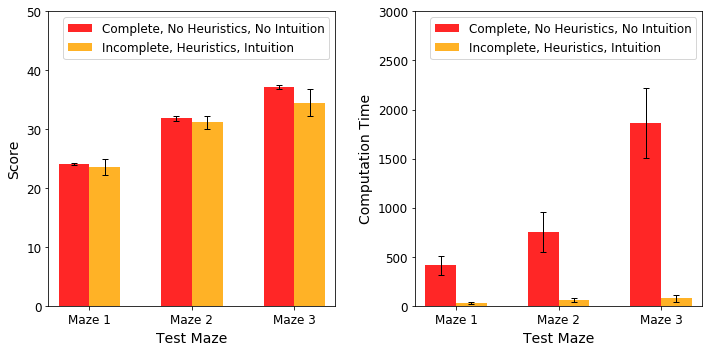

In [293]:
dataset_1_means = dataset_worst_score_means
dataset_2_means = dataset_best_score_means
dataset_1_std = dataset_worst_score_std
dataset_2_std = dataset_best_score_std

N = len(dataset_1_means)
ind = np.arange(N)  # the x locations for the groups
width = 0.30       # the width of the bars
alpha = 0.85

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

rects1 = ax[0].bar(ind, dataset_1_means, width, color='red', yerr = dataset_1_std, alpha = alpha, 
                capsize = 3, error_kw = {'elinewidth':1})
rects2 = ax[0].bar(ind + width, dataset_2_means, width, color='orange', yerr = dataset_2_std, alpha = alpha, 
                capsize = 3, error_kw = {'elinewidth':1})

ax[0].set_ylim([0,50])
ax[0].set_xlim([-0.25,2.55])
# add some text for labels, title and axes ticks
ax[0].set_xlabel('Test Maze', fontsize=14,  labelpad = 5)
ax[0].set_ylabel('Score', fontsize=14, labelpad = 5)
ax[0].set_title('')
ax[0].set_xticks(ind + width / 2)
ax[0].set_xticklabels(('Maze 1', 'Maze 2', 'Maze 3'))

ax[0].legend((rects1[0], rects2[0]), ('Complete, No Heuristics, No Intuition', 'Incomplete, Heuristics, Intuition'), loc = 'upper right', fontsize=12)

ax[0].tick_params(labelsize=12)

dataset_1_means = dataset_worst_computation_means
dataset_2_means = dataset_best_computation_means
dataset_1_std = dataset_worst_computation_std
dataset_2_std = dataset_best_computation_std

rects1 = ax[1].bar(ind, dataset_1_means, width, color='red', yerr = dataset_1_std, alpha = alpha, 
                capsize = 3, error_kw = {'elinewidth':1})
rects2 = ax[1].bar(ind + width, dataset_2_means, width, color='orange', yerr = dataset_2_std, alpha = alpha, 
                capsize = 3, error_kw = {'elinewidth':1})

ax[1].set_ylim([0,3000])
ax[1].set_xlim([-0.25,2.55])
# add some text for labels, title and axes ticks
ax[1].set_xlabel('Test Maze', fontsize=14,  labelpad = 5)
ax[1].set_ylabel('Computation Time', fontsize=14, labelpad = 5)
ax[1].set_title('')
ax[1].set_xticks(ind + width / 2)
ax[1].set_xticklabels(('Maze 1', 'Maze 2', 'Maze 3'))

ax[1].legend((rects1[0], rects2[0]), ('Complete, No Heuristics, No Intuition', 'Incomplete, Heuristics, Intuition'), loc = 'upper right', fontsize=12)

ax[1].tick_params(labelsize=12)

plt.tight_layout(w_pad=2, h_pad=0)
plt.show()

fig.savefig('score_worst_vs_best.jpeg', format='jpeg', dpi=600, bbox_inches='tight')

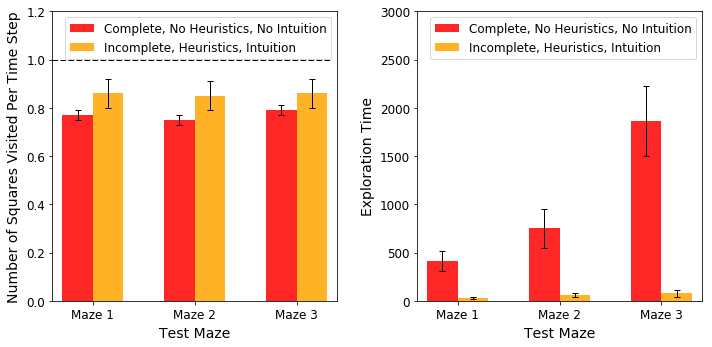

In [294]:
dataset_1_means = dataset_worst_nsquares_means
dataset_2_means = dataset_best_nsquares_means
dataset_1_std = dataset_worst_nsquares_std
dataset_2_std = dataset_best_nsquares_std

N = len(dataset_1_means)
ind = np.arange(N)  # the x locations for the groups
width = 0.30       # the width of the bars
alpha = 0.85

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

rects1 = ax[0].bar(ind, dataset_1_means, width, color='red', yerr = dataset_1_std, alpha = alpha, 
                capsize = 3, error_kw = {'elinewidth':1})
rects2 = ax[0].bar(ind + width, dataset_2_means, width, color='orange', yerr = dataset_2_std, alpha = alpha, 
                capsize = 3, error_kw = {'elinewidth':1})

ax[0].set_ylim([0,1.2])
ax[0].set_xlim([-0.25,2.55])
# add some text for labels, title and axes ticks
ax[0].set_xlabel('Test Maze', fontsize=14,  labelpad = 5)
ax[0].set_ylabel('Number of Squares Visited Per Time Step', fontsize=14, labelpad = 5)
ax[0].set_title('')
ax[0].set_xticks(ind + width / 2)
ax[0].set_xticklabels(('Maze 1', 'Maze 2', 'Maze 3'))

line_1 = ax[0].plot(np.linspace(-0.25, 2.5, 100), np.linspace(1.0, 1.0, 100), linestyle = '--', linewidth = 1, color = 'black', alpha = 1)

ax[0].legend((rects1[0], rects2[0]), ('Complete, No Heuristics, No Intuition', 'Incomplete, Heuristics, Intuition'), loc = 'upper right', fontsize=12)

ax[0].tick_params(labelsize=12)

dataset_1_means = dataset_worst_exploration_means
dataset_2_means = dataset_best_exploration_means
dataset_1_std = dataset_worst_exploration_std
dataset_2_std = dataset_best_exploration_std

rects1 = ax[1].bar(ind, dataset_1_means, width, color='red', yerr = dataset_1_std, alpha = alpha, 
                capsize = 3, error_kw = {'elinewidth':1})
rects2 = ax[1].bar(ind + width, dataset_2_means, width, color='orange', yerr = dataset_2_std, alpha = alpha, 
                capsize = 3, error_kw = {'elinewidth':1})

ax[1].set_ylim([0,3000])
ax[1].set_xlim([-0.25,2.55])
# add some text for labels, title and axes ticks
ax[1].set_xlabel('Test Maze', fontsize=14,  labelpad = 5)
ax[1].set_ylabel('Exploration Time', fontsize=14, labelpad = 5)
ax[1].set_title('')
ax[1].set_xticks(ind + width / 2)
ax[1].set_xticklabels(('Maze 1', 'Maze 2', 'Maze 3'))

ax[1].legend((rects1[0], rects2[0]), ('Complete, No Heuristics, No Intuition', 'Incomplete, Heuristics, Intuition'), loc = 'upper right', fontsize=12)

ax[1].tick_params(labelsize=12)

plt.tight_layout(w_pad=2, h_pad=0)
plt.show()

fig.savefig('nsquare_worst_vs_best.jpeg', format='jpeg', dpi=600, bbox_inches='tight')